In [2]:
from patchify import patchify
import matplotlib.pyplot as plt
import cv2

Extracting patches from large images and masks for semantic segmentation training

original size of large image:  (7647, 670, 3)
size of large image after resizing:  (7168, 512, 3)


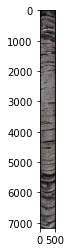

In [7]:
large_image = cv2.imread('1000278.jpeg')
h, w, c = large_image.shape
h = h//512 * 512
w = w//512 * 512
print('original size of large image: ',large_image.shape)
large_image = cv2.resize(large_image, (w, h))
print('size of large image after resizing: ', large_image.shape)
plt.imshow(large_image)

In [16]:
patches = patchify(large_image[:,:,0], (w, w), step=w) # cut last channel (R-G-B <- blue channel)

In [17]:
patches.shape

(14, 1, 512, 512)

In [48]:
import torchvision.transforms as tt

In [33]:
from PIL import Image
w = 512
large_image = Image.open('1000278.jpeg')
img = tt.ToTensor()(large_image)
img = tt.Resize([7168, 1024])(img)
print('size of large image after resizing: ', img.shape)
patches = img.unfold(1, w, step=w).unfold(2, w, step=w)
print('size of patch: ', patches.shape)
patches = patches.contiguous().view(3, -1, w, w) # chanell - number of patches - h - w
print('size of patch after view: ', patches.shape)
patches = patches.contiguous().permute(1, 0, 2, 3)
print('size of patch after permute: ', patches.shape)

size of large image after resizing:  torch.Size([3, 7168, 1024])
size of patch:  torch.Size([3, 14, 2, 512, 512])
size of patch after view:  torch.Size([3, 28, 512, 512])
size of patch after permute:  torch.Size([28, 3, 512, 512])


In [42]:
import numpy as np
mask = np.load('C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/labels/daylight/label_1000278.npz')
mask = mask['x']

In [43]:
import torch
mask = torch.from_numpy(mask)
print('size of large mask: ', mask.shape)

size of large mask:  torch.Size([7647, 670])


In [44]:
mask = mask.unsqueeze(0)
w = 512
print('size of large mask after unsqueeze: ', mask.shape)
mask = tt.Resize([7168, 1024])(mask)
print('size of large mask after resizing: ', mask.shape)
mask_patches = mask.unfold(1, w, step=w).unfold(2, w, step=w)
print('size of masks patch: ', mask_patches.shape)
mask_patches = mask_patches.contiguous().view(1, -1, w, w) # chanell - number of patches - h - w
print('size of masks patch after view: ', mask_patches.shape)
mask_patches = mask_patches.contiguous().permute(1, 0, 2, 3)
print('size of masks patch after permute: ', mask_patches.shape)

size of large mask after unsqueeze:  torch.Size([1, 7647, 670])
size of large mask after resizing:  torch.Size([1, 7168, 1024])
size of masks patch:  torch.Size([1, 14, 2, 512, 512])
size of masks patch after view:  torch.Size([1, 28, 512, 512])
size of masks patch after permute:  torch.Size([28, 1, 512, 512])


In [49]:
import torch
w = 512
mask1 = np.load('C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/labels/daylight/label_1000278.npz')
mask1 = mask1['x']
mask1 = torch.from_numpy(mask1)
mask1 = tt.Resize([7168, 1024])(mask1)
print('size of large mask after resizing: ', mask1.shape)
mask1_patches = mask1.unfold(0, w, step=w).unfold(1, w, step=w)
print('size of masks patch: ', mask1_patches.shape)
mask1_patches = mask1_patches.contiguous().view(-1, w, w) # chanell - number of patches - h - w
print('size of masks patch after view: ', mask1_patches.shape)
mask1_patches = mask1_patches.contiguous().permute(1, 0, 2, 3)
print('size of masks patch after permute: ', mask1_patches.shape)

ValueError: size shape must match input shape. Input is 1D, size is 2

In [127]:
from sklearn.feature_extraction.image import reconstruct_from_patches_2d

In [135]:
img = reconstruct_from_patches_2d(pathes, (7168, 512, 3))

TypeError: Concatenation operation is not implemented for NumPy arrays, use np.concatenate() instead. Please do not rely on this error; it may not be given on all Python implementations.